## PROYECTO FINAL. Modelos y Aprendizajes

#### Carga de Librerías

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  # Importar MLPClassifier
from sklearn.preprocessing import StandardScaler

#### Archivos Originales

In [2]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

In [3]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

In [4]:
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

#### Carga de Datos breast_cancer_wisconsin_diagnostic utilizando URL

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter', 'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']
data = pd.read_csv(url, names=column_names, header=None)
print(data)

           ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     Mean Smoothness  Mean 

#### Preprocesamiento de Datos

In [6]:
# Eliminar la columna ID
data.drop('ID', axis=1, inplace=True)
# Convertir la columna de Diagnosis a valores numéricos (Maligno=1, Benigno=0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Se dividen los datos en conjuntos de train y test
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
print("Número de instancias:", X.shape[0])
print("Número de características:", X.shape[1])
print("Número de etiquetas:", len(set(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Número de instancias: 569
Número de características: 30
Número de etiquetas: 2


In [8]:
# Se escalan las características para estandarizarlas antes de entrenar el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Definición de Modelos

In [9]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, solver='liblinear'),  # Aumentamos el número máximo de iteraciones
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

#### Entrenamiento de Modelos y Cálculo de Matrices de Confusión

Modelo: Logistic Regression
Accuracy de entrenamiento: 0.9582417582417583
Accuracy de prueba: 0.956140350877193
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



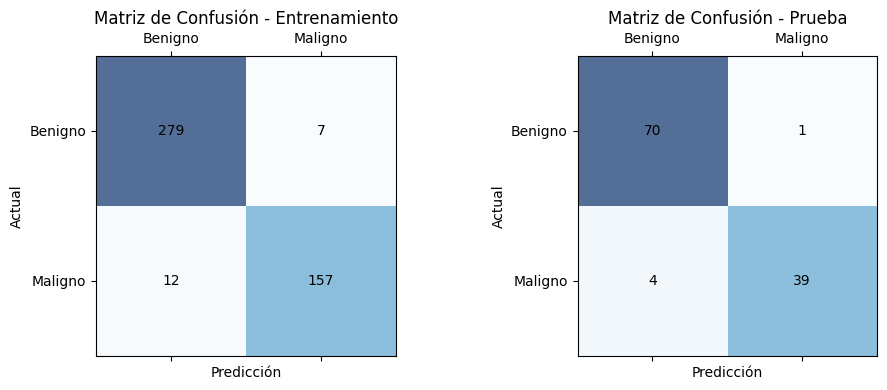

---------------------------------------------------------
Modelo: Random Forest
Accuracy de entrenamiento: 1.0
Accuracy de prueba: 0.956140350877193
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



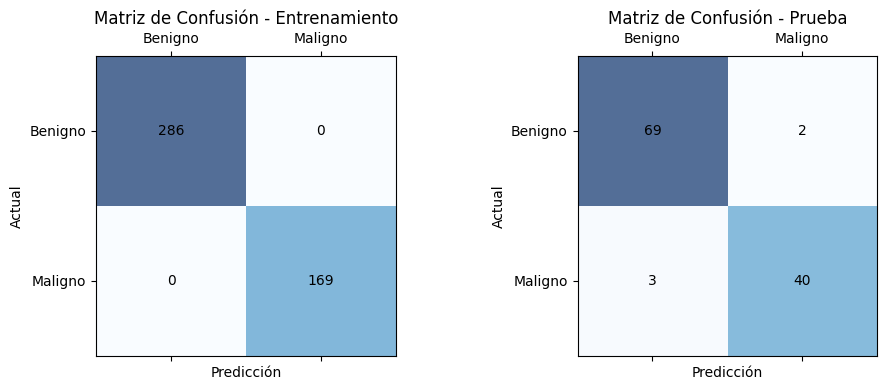

---------------------------------------------------------
Modelo: Neural Network
Accuracy de entrenamiento: 0.9076923076923077
Accuracy de prueba: 0.9473684210526315
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        71
           1       0.88      1.00      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114



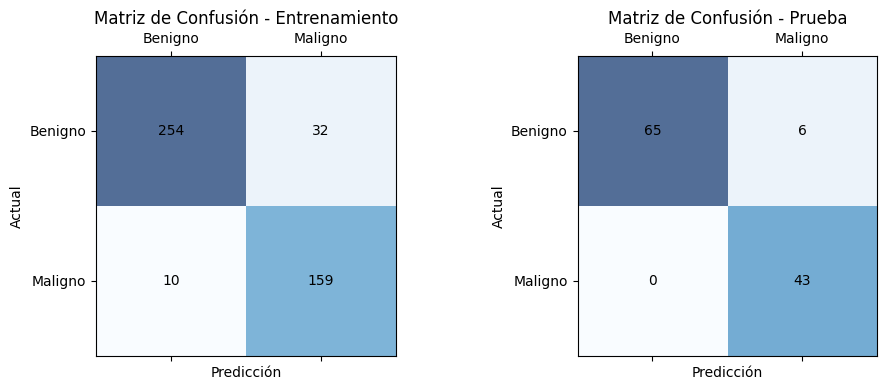

---------------------------------------------------------


In [10]:
# Entrenamiento de modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
# Cálculo y muestra de matrices de confusión de Entrenamiento y Prueba
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
     
    print(f"Modelo: {name}")
    print("Accuracy de entrenamiento:", accuracy_score(y_train, y_pred_train))
    print("Accuracy de prueba:", accuracy_score(y_test, y_pred_test))
    report = classification_report(y_test, y_pred_test)
    print(f"Reporte de Clasificación:\n{report}")
       
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    labels = ['Benigno', 'Maligno']
    
    # Matriz de confusión para el conjunto de entrenamiento
    axes[0].matshow(cm_train, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(cm_train.shape[0]):
        for j in range(cm_train.shape[1]):
            axes[0].text(x=j, y=i, s=cm_train[i, j], va='center', ha='center')
    axes[0].set_xticks(range(len(labels)))
    axes[0].set_xticklabels(labels)
    axes[0].set_yticks(range(len(labels)))
    axes[0].set_yticklabels(labels)
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Matriz de Confusión - Entrenamiento')

    # Matriz de confusión para el conjunto de prueba
    axes[1].matshow(cm_test, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(cm_test.shape[0]):
        for j in range(cm_test.shape[1]):
            axes[1].text(x=j, y=i, s=cm_test[i, j], va='center', ha='center')
    axes[1].set_xticks(range(len(labels)))
    axes[1].set_xticklabels(labels)
    axes[1].set_yticks(range(len(labels)))
    axes[1].set_yticklabels(labels)
    axes[1].set_xlabel('Predicción')
    axes[1].set_ylabel('Actual')
    axes[1].set_title('Matriz de Confusión - Prueba')
       
    plt.tight_layout()
    plt.show()
    print("---------------------------------------------------------")
    
    